# Overview
In this lesson you will learn about 4th order Runge-Kutta and the python coding concepts needed to implement it.  You'll also learn how to fit a function to some data and how to code using classes in python.

## Coding concepts
You will learn about the following coding concepts today:

1. Fitting data to functions.
2. Coding with classes in python.


### Fitting data to a function

As a scientist, you will frequently gather data. Usually when you gather data, the goal is to use that data to uncover some relationship between the two variables. In other words, you’d like to find a function that best mimicks the data that you’ve gathered. Doing this in python is straightforward.  Below you will find a complete example of fitting a function to a data set using a function from the library: scipy.optimize.  


1. <span style="color:red">Study the code until you understand it.</span>
2. <span style="color:red">Add comments next to each line.</span>


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


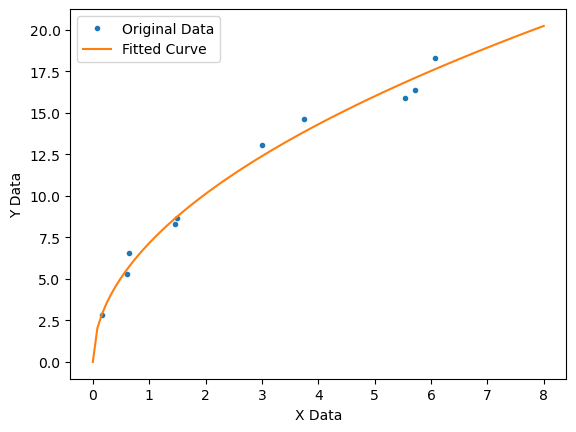

In [1]:
# Importing necessary libraries
from matplotlib import pyplot
from numpy import sqrt, linspace
import scipy.optimize as opt

# Made up data set
xData = [5.53339, 0.609489, 0.170791, 1.4941, 0.64862, 3.0039, 5.71816, 3.75386, 1.46407, 6.07365]
yData = [15.8675, 5.26979, 2.84326, 8.68502, 6.58179, 13.0512, 16.3664, 14.61, 8.2878, 18.2869]

# Defining the fitting function
def fitFunc(x, a, b):
    return a * sqrt(abs(b) * x)

# Fitting the curve using scipy's curve_fit function
fit = opt.curve_fit(fitFunc, xData, yData)
aFit = fit[0][0]  # Extracting the fitted 'a' parameter
bFit = fit[0][1]  # Extracting the fitted 'b' parameter

# Generating x values for plotting
xDense = linspace(0, 8, 100)
# Using the fitted parameters to generate y values for the fitted curve
yFit = aFit * sqrt(bFit * xDense)

# Plotting the original data points
pyplot.plot(xData, yData, '.', label='Original Data')
# Plotting the fitted curve
pyplot.plot(xDense, yFit, label='Fitted Curve')

# Adding labels and legend
pyplot.xlabel('X Data')
pyplot.ylabel('Y Data')
pyplot.legend()

# Displaying the plot
pyplot.show()


### Classes
Often your task involves comparing the results of many calculations, each performed with different physical or initial conditions. For example, a problem from chapter 2 asked for an investigation of the trajectory of knuckleball pitches thrown with different rates of spin, throwing velocities, and initial stitching orientations.  If you think about that problem for a minute, you'll realize that you will need to calculate many, many baseball trajectories.  The last thing you want is a gigantic code with 20 while loops, one right after the other.  Using classes is a great way to build code that avoids repetition.  Below you will find my solution to the knuckleball problem from chapter 2. 

1. <span style="color:red">Execute the code below.  Look at the results until you understand what is being displayed.  Ask any questions you may have.</span>  
2. <span style="color:red">Study the code  thoroughly. Ask questions, answer question etc.</span>  
3. <span style="color:red">Add comments to lines of code whose meanings are not obvious. (You can omit comments for obvious ones.)  </span>


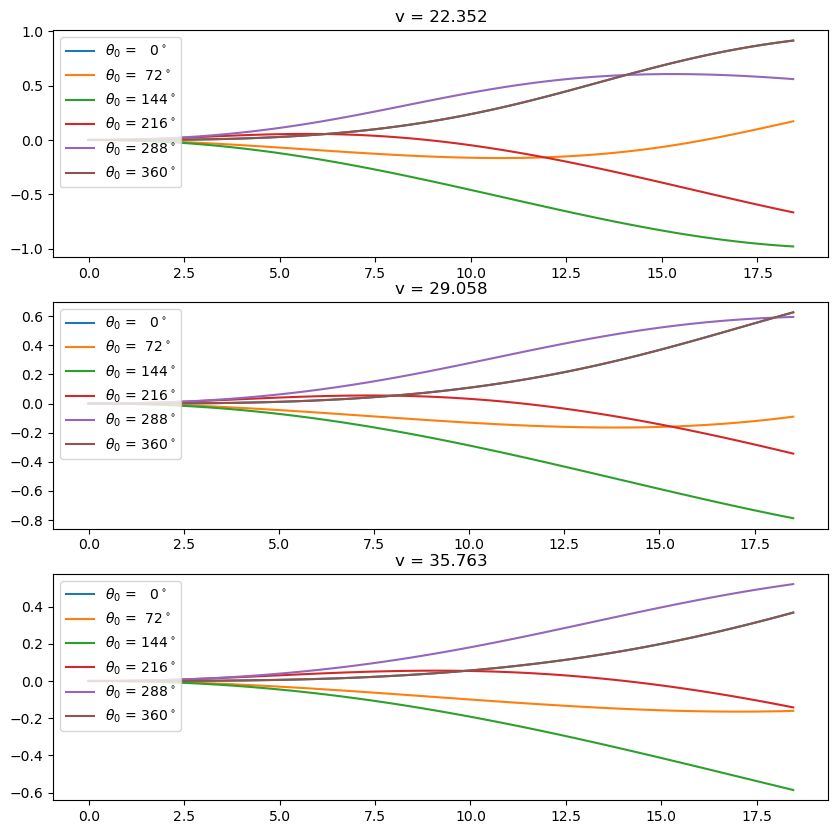

In [2]:
# Importing necessary libraries
from matplotlib import pyplot as plt
from numpy import array, pi, cross, cos, sin, linspace, exp
from numpy.linalg import norm

# Defining a class for projectile motion
class projectile:
    def __init__(self, rho, dt=0.001):
        self.dt = dt
        self.g = 9.8  # Acceleration due to gravity (m/s^2)
        self.rho0 = 1.225  # Standard air density at sea level (kg/m^3)
        self.rho = rho  # Air density (kg/m^3)

    # Function to calculate the coefficient of drag
    def B2oM(self):
        return 3.9e-3 + 5.8e-3 / (1 + exp((norm(self.v[-1]) - 35) / 5))

    # Function to calculate lateral force
    def Flateral(self):
        return self.g * 0.5 * (sin(4 * self.theta[-1]) - 0.25 * sin(8 * self.theta[-1]) +
                                0.08 * sin(12 * self.theta[-1]) - 0.025 * sin(16 * self.theta[-1]))

    # Function to set initial conditions
    def setInitialConditions(self, r0, v0, theta0, omega):
        self.r = [r0]
        self.v = [v0]
        self.theta = [theta0]
        self.omega = omega

    # Function implementing Euler's method for numerical integration
    def Euler(self):
        while self.r[-1][0] <= 60 * 0.3048:  # Conversion from feet to meters
            dragX = -self.B2oM() * self.rho / self.rho0 * norm(self.v[-1]) * (self.v[-1])[0]
            dragY = -self.B2oM() * self.rho / self.rho0 * norm(self.v[-1]) * (self.v[-1])[1]
            dragZ = -self.B2oM() * self.rho / self.rho0 * norm(self.v[-1]) * (self.v[-1])[2]
            a = array([dragX, dragY - self.g, dragZ + self.Flateral()])
            self.r.append(self.r[-1] + self.v[-1] * self.dt)
            self.v.append(self.v[-1] + a * self.dt)
            self.theta.append(self.theta[-1] + self.omega * self.dt)

    # Function to plot x-z trajectory
    def plotxz(self, ax, label):
        ax.plot([x[0] for x in self.r], [x[2] for x in self.r], label=label)

    # Function to plot x-y trajectory
    def plotxy(self, ax, label):
        ax.plot([x[0] for x in self.r], [x[1] for x in self.r], 'r-', label=label)

# Setting parameters
dt = 0.01
x = 0
y = 1.5
z = 0
r = array([x, y, z])
theta = 0 * pi / 180.
speed = 65 * 0.44704  # Conversion from mph to m/s

rho = 1.22

thetaI = 0.51
omega = 0.2 * 2 * pi

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Creating projectile object
myprojectile = projectile(rho, dt=dt)

# Looping through different initial speeds
for idx, speed in enumerate(array([50, 65, 80]) * 0.44704):  # Converting mph to m/s
    vx = speed * cos(theta)
    vy = speed * sin(theta)
    v = array([vx, vy, 0])

    # Looping through different initial launch angles
    for thetaI in linspace(0, 2 * pi, 6):
        myprojectile.setInitialConditions(r, v, thetaI, omega)
        myprojectile.Euler()
        myprojectile.plotxz(axes[idx], label=r'$\theta_0$ = {:3.0f}$^\circ$'.format(thetaI * 180 / pi))

    axes[idx].set_title("v = {:5.3f}".format(speed))
    axes[idx].legend(loc="upper left")

# Displaying the plot
plt.show()



Let me take a minute to point out some important points about classes.

1. A class is defined using the keyword "class" followed by the user-defined name of the class. (Don't forget the semicolon.)
2. Just like with function and loops, indentation matters.  It is how python knows what is inside the class and what is not.
3. Member functions must have the "self" argument at the first position in the argument list.
4. When using or defining member variables, you must use the "self." prefix.
5. Arguments to functions can be designated as "optional" if you use the "=" to define a default value in the argument list. Optional arguments must come last in the argument list.
6. The function named "\_\_init\_\_" is a special one.  This function is executed when you initiate an instance of the class.  (i.e. when this line is encountered: "myprojectile = projectile(rho,dt)")
7. Member functions are called using the name given to the class instance followed by the "." and the name of the function. (i.e. "myprojectile.Euler()")
7. "Enumerate" is a handy function when you need access not only to the elements in a list (or array) but also the locations of these elements.

## 4th order Runge-Kutta

Recall how we arrived at 2nd-order Runge-Kutta:  We performed multiple Taylor expansions and combined them such that the 2nd order term cancelled out.  We can continue this process with more Taylor expansions (although I won't do it here) so that 3rd and 4th order terms cancel out.  Since we no longer have to neglect these higher-order terms (pretend they're small contributors) this will result in a more accurate method.  Instead of showing all of the steps, I'll simply quote the result:

$$\vec{k}_1 = \vec{f}(\vec{r}_n,t_n) \Delta t $$
$$\vec{k}_2 = \vec{f}(\vec{r}_n + {1\over 2} \vec{k_1}, t_n + {1\over 2} \Delta t) \Delta t $$
$$\vec{k}_3 = \vec{f}(\vec{r}_n + {1\over 2} \vec{k_2}, t_n + {1\over 2} \Delta t) \Delta t $$
$$\vec{k}_4 = \vec{f}(\vec{r}_n + \vec{k_3}, t_n + \Delta t) \Delta t $$
$$\vec{r}_{n+1} = \vec{r}_n + {1\over 6} (\vec{k_1} + 2 \vec{k_2} + 2 \vec{k}_3 + \vec{k_4})$$

Let's not forget several important things about these expressions:

1. Vector $\vec{r}$ in this equation is **not the position vector**.  Rather, it represents the vector containing all to-be-solved-for variables in the problem of interest.  If the problem is 2-D projectile motion, the variables would be: $x$, $v_x$, $y$, and $v_y$. If the problem is a pendulum, the variables would be $\theta$ and $\omega$.  
2. Function $\vec{f}$ is a function that returns **a vector of derivative values**, one for each relevant variable in the problem.
3. Don't forget to evaluate $\vec{f}$ at the prescribed moment in time.



Below you will find the 2nd order Runge-Kutta code from last week's code lesson with a new function added for 4th order Runge Kutta.

1. <span style="color:red"> Execute the code and wait for the results to appear. Draw a conclusion from the plot and write it down in the cell below.</span>
2. <span style="color:red"> Add comments next to any new code, code that wasn't present in last week's version. </span>
3. <span style="color:red"> "Class"-ify this code.  Copy the entire code to a new cell and convert it into a class with these functions.  When finished, the new code should produce the same results as the original code block.  </span>





setting dt to   1.000000
setting dt to   0.500000
setting dt to   0.250000
setting dt to   0.125000
setting dt to   0.062500
setting dt to   0.031250
setting dt to   0.015625
setting dt to   0.007812
setting dt to   0.003906
setting dt to   0.001953
setting dt to   0.000977
setting dt to   0.000488
setting dt to   0.000244


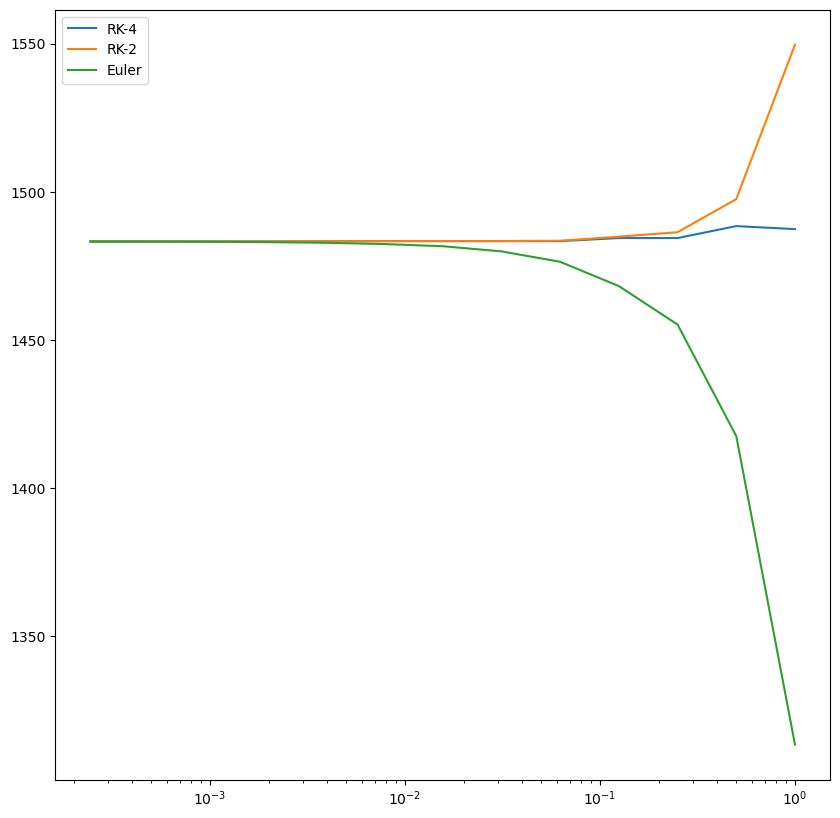

In [3]:
from numpy.linalg import norm
from numpy import arange,array,pi,cos,sin,copy
from matplotlib import pyplot as plt

def derivs(vars):
    r = vars[:2]
    v = vars[2:]
    g = 9.8
    B2 = 1.3e-3

    xDeriv = v[0]
    yDeriv = v[1]
    speed = norm(v)
    vxDeriv = -B2 * speed * v[0]
    vyDeriv = -B2 * speed * v[1] - g
    return array([xDeriv,yDeriv,vxDeriv,vyDeriv])

def EulerTrajectory(rInitial, vInitial,dt):
    B2 = 1.3e-3
    g=9.8
    r = copy(rInitial)
    v = copy(vInitial)
    while r[1] >= 0:
        r += v * dt
        speed = norm(v)
        a = array([-B2 * speed * v[0],-B2 * speed * v[1] - g])
        v += a * dt
    return r[0]

def RK2Trajectory(r,v,dt):
    vars = array([r[0],r[1],v[0],v[1]])
    while vars[1] >= 0:
        k1 = dt * derivs(vars)
        k2 = dt * derivs(vars + 1/2 * k1)
        vars += k2


    return vars[0]


def RK4Trajectory(r,v,dt):
    vars = array([r[0],r[1],v[0],v[1]])
    while vars[1] >= 0:
        k1 = dt * derivs(vars)
        k2 = dt * derivs(vars + 1/2 * k1)
        k3 = dt * derivs(vars + 1/2 * k2)
        k4 = dt * derivs(vars + k3)
        
        vars += 1/6. * (k1 + 2 * k2 + 2 * k3 + k4)


    return vars[0]



rInitial = array([0.,0.])
speed = 400
theta = 45 * pi/180
vInitial = array([speed * cos(theta), speed * sin(theta)])
EulerRanges = []
RK2Ranges = []
RK4Ranges = []
dt = 1
dts = []
while dt > 2e-4:
    dts.append(dt)
    print("setting dt to {:10.6f}".format(dt))
    r = copy(rInitial)
    v = copy(vInitial)
    rangeRK4 = RK4Trajectory(r,v,dt)
    rangeEuler = EulerTrajectory(r,v,dt)
    rangeRK2 = RK2Trajectory(r,v,dt)
    EulerRanges.append(rangeEuler)
    RK2Ranges.append(rangeRK2)
    RK4Ranges.append(rangeRK4)

    dt /= 2

fig,ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(dts,RK4Ranges,label='RK-4')
ax.plot(dts,RK2Ranges,label='RK-2')
ax.plot(dts,EulerRanges,label='Euler')
ax.set_xscale('log')
ax.legend()
plt.show()


Draw your conclusion from the plot above here..

setting dt to   1.000000
setting dt to   0.500000
setting dt to   0.250000
setting dt to   0.125000
setting dt to   0.062500
setting dt to   0.031250
setting dt to   0.015625
setting dt to   0.007812
setting dt to   0.003906
setting dt to   0.001953
setting dt to   0.000977
setting dt to   0.000488
setting dt to   0.000244


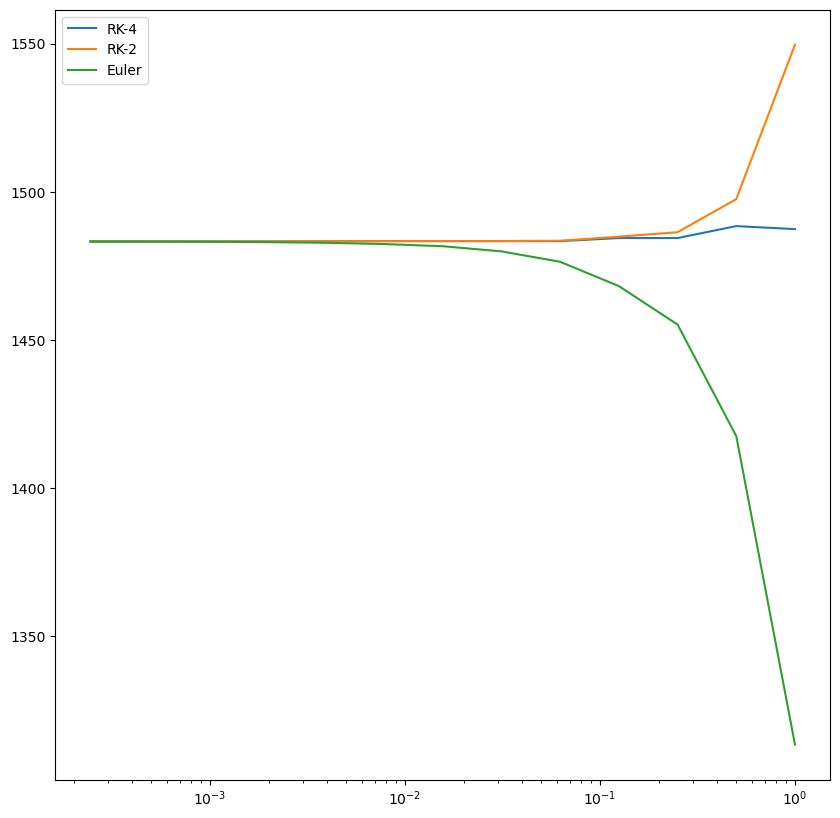

In [8]:
# Build your class here.
import numpy as np
import matplotlib.pyplot as plt

class RK4:
    def __init__(self, rInitial, vInitial, dt):
        """
        Initialize the RK4 solver with initial position, initial velocity, and time step.

        Parameters:
        - rInitial: Initial position vector [x, y]
        - vInitial: Initial velocity vector [vx, vy]
        - dt: Time step for numerical integration
        """
        self.rInitial = rInitial
        self.vInitial = vInitial
        self.dt = dt

    def derivs(self, vars):
        """
        Calculate the derivatives of the state variables.

        Parameters:
        - vars: State variables [x, y, vx, vy]

        Returns:
        - Array of derivatives [xDeriv, yDeriv, vxDeriv, vyDeriv]
        """
        r = vars[:2]
        v = vars[2:]
        g = 9.8
        B2 = 1.3e-3

        xDeriv = v[0]
        yDeriv = v[1]
        speed = np.linalg.norm(v)
        vxDeriv = -B2 * speed * v[0]
        vyDeriv = -B2 * speed * v[1] - g
        return np.array([xDeriv, yDeriv, vxDeriv, vyDeriv])
    
    def Euler(self):
        """
        Computes the numerical integration using Euler method

        Returns:
        - Gets the final max range reached by the projectile
        """
        vars = np.array([self.rInitial[0], self.rInitial[1], self.vInitial[0], self.vInitial[1]])
        B2 = 1.3e-3
        g = 9.8
        r = copy(vars[:2])
        v = copy(vars[2:])
        
        while r[1] >= 0:
            r += v * self.dt
            speed = norm(v)
            a = array([- B2 * speed * v[0],- B2 * speed * v[1] - g])
            v += a * self.dt
        
        return r[0]
    
    def RK2(self):
        """
        Calculates the RK2 trajectory with numerical integration

        Returns:
        - Max range (horizontal distance) of the projectile
        """
        vars = np.array([self.rInitial[0], self.rInitial[1], self.vInitial[0], self.vInitial[1]])
        while vars[1] >= 0:
            k1 = dt * derivs(vars)
            k2 = dt * derivs(vars + 1/2 * k1)
            vars += k2

        return vars[0]

    def RK4(self):
        """
        Perform numerical integration using the RK4 method to calculate projectile trajectory.

        Returns:
        - Horizontal distance traveled by the projectile
        """
        vars = np.array([self.rInitial[0], self.rInitial[1], self.vInitial[0], self.vInitial[1]])
        while vars[1] >= 0:
            k1 = self.dt * self.derivs(vars)
            k2 = self.dt * self.derivs(vars + 0.5 * k1)
            k3 = self.dt * self.derivs(vars + 0.5 * k2)
            k4 = self.dt * self.derivs(vars + k3)
            vars += (k1 + 2 * k2 + 2 * k3 + k4) / 6.

        return vars[0]

# Initial conditions
rInitial = np.array([0., 0.])
speed = 400
theta = np.pi / 4
vInitial = np.array([speed * np.cos(theta), speed * np.sin(theta)])

# Lists to store results
EulerRanges = []
RK2Ranges = []
RK4Ranges = []
dts = []

# Iterating over different time steps
dt = 1
while dt > 2e-4:
    dts.append(dt)
    print("setting dt to {:10.6f}".format(dt))
    
    # Solve using RK4
    solver = RK4(rInitial, vInitial, dt)
    rangeRK4 = solver.RK4()
    rangeEuler = solver.Euler()
    rangeRK2 = solver.RK2()
    
    # Append results
    EulerRanges.append(rangeEuler)
    RK2Ranges.append(rangeRK2)
    RK4Ranges.append(rangeRK4)

    # Reduce time step for next iteration
    dt /= 2

# Plotting results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(dts, RK4Ranges, label='RK-4')
ax.plot(dts, RK2Ranges, label='RK-2')
ax.plot(dts, EulerRanges, label='Euler')
ax.set_xscale('log')
ax.legend()
plt.show()
